# ECONOMIC DATA ANALYSIS USING FRED API AND PANDAS

In [138]:
!pip install fredapi > /dev/null

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [140]:
plt.style.use('fivethirtyeight')

pd.options.display.max_rows = 500

color_pal = plt.rcParams["axes.prop_cycle"].by_key()['color'] ## uses default colors from the theme we are using

In [141]:
from fredapi import Fred

fred_key = '17fd38b3faf2e995dd157099718bb36a'

## 1. CREATE FRED OBJECT

In [142]:
fred = Fred(api_key = fred_key)

## 2. SEARCH FOR ECONOMIC DATA

In [143]:
sp_search = fred.search('S&P', order_by = 'popularity')

In [144]:
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2024-05-04   2024-05-04   
CSUSHPINSA          CSUSHPINSA     2024-05-04   2024-05-04   
SP500                    SP500     2024-05-04   2024-05-04   
MEHOINUSA672N    MEHOINUSA672N     2024-05-04   2024-05-04   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2024-05-04   2024-05-04   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA      S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2024-05-02  Daily, Close   
CSUSHPINSA            1987-01-01      2024-02-01       Monthly   
SP500                 2014-05-05      2024-05-03  Daily, Close   
MEHOINUSA672N         1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY        1996-12-31      2024-05-02  Daily, Close   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
SP500                        D                           Index   
MEHOINUSA672N                A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY               D                         Percent   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2024-05-03 09:09:08-05:00   
CSUSHPINSA                           NSA  2024-04-30 08:12:01-05:00   
SP500                                NSA  2024-05-03 19:11:01-05:00   
MEHOINUSA672N                        NSA  2023-09-12 13:48:02-05:00   
BAMLH0A0HYM2EY                       NSA  2024-05-03 09:09:11-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           92  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             88  For more information regarding the index, plea...  
SP500                  83  The observations for the S&P 500 represent the...  
MEHOINUSA672N          83  Household data are collected as of March.  As ...  
BAMLH0A0HYM2EY         82  This data represents the effective yield of th...

## 3. PULL RAW DATA AND PLOT

In [145]:
sp500 = fred.get_series(series_id = 'SP500')

<Axes: title={'center': 'S&P 500'}>

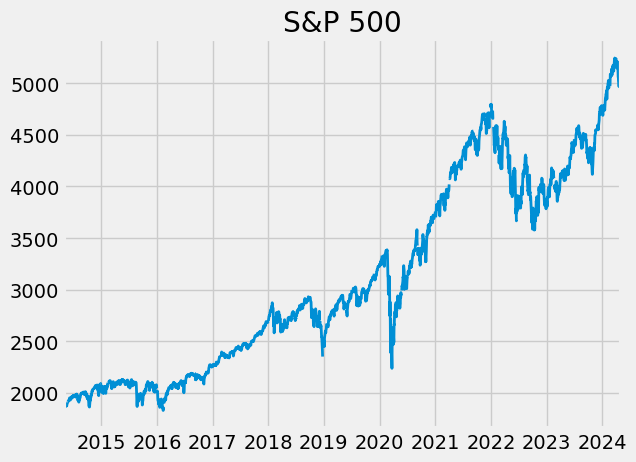

In [146]:
sp500.plot(title = 'S&P 500', lw = 2)

## 4. PULL AND JOIN MULTIPLE DATA SERIES

In [147]:
unemp_results = fred.search('unemployment')

In [148]:
unrate = fred.get_series('UNRATE')

In [149]:
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-12-01    3.7
2024-01-01    3.7
2024-02-01    3.9
2024-03-01    3.8
2024-04-01    3.9
Length: 916, dtype: float64

<Axes: title={'center': 'UNEMPLOYMENT RATE'}>

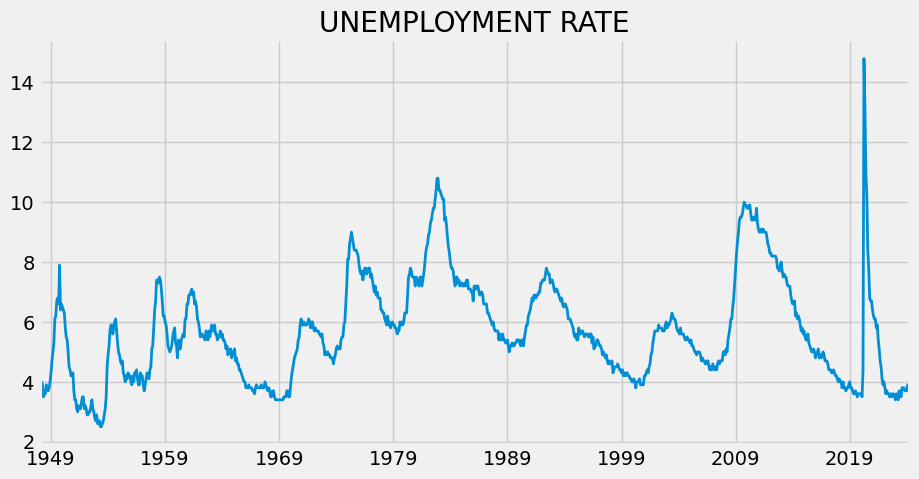

In [150]:
unrate.plot(figsize = (10,5), title = 'UNEMPLOYMENT RATE', lw = 2)

### 2019 - 2021 = COVID 19

In [151]:
unemp_results

id realtime_start realtime_end  \
series id                                                                  
UNRATE                                UNRATE     2024-05-04   2024-05-04   
UNRATENSA                          UNRATENSA     2024-05-04   2024-05-04   
UNEMPLOY                            UNEMPLOY     2024-05-04   2024-05-04   
NROU                                    NROU     2024-05-04   2024-05-04   
CCSA                                    CCSA     2024-05-04   2024-05-04   
...                                      ...            ...          ...   
LAUCN340030000000003A  LAUCN340030000000003A     2024-05-04   2024-05-04   
LMUNRRTTLUM156S              LMUNRRTTLUM156S     2024-05-04   2024-05-04   
LNS14000315                      LNS14000315     2024-05-04   2024-05-04   
LNU04032222                      LNU04032222     2024-05-04   2024-05-04   
LNU04032223                      LNU04032223     2024-05-04   2024-05-04   

                                                                   title  \
series id                                                                  
UNRATE                                                 Unemployment Rate   
UNRATENSA                                              Unemployment Rate   
UNEMPLOY                                              Unemployment Level   
NROU                                    Noncyclical Rate of Unemployment   
CCSA                             Continued Claims (Insured Unemployment)   
...                                                                  ...   
LAUCN340030000000003A             Unemployment Rate in Bergen County, NJ   
LMUNRRTTLUM156S        Infra-Annual Registered Unemployment and Job V...   
LNS14000315                            Unemployment Rate - Married Women   
LNU04032222            Unemployment Rate - Natural Resources, Constru...   
LNU04032223            Unemployment Rate - Farming, Fishing, and Fore...   

                      observation_start observation_end  \
series id                                                 
UNRATE                       1948-01-01      2024-04-01   
UNRATENSA                    1948-01-01      2024-04-01   
UNEMPLOY                     1948-01-01      2024-04-01   
NROU                         1949-01-01      2034-10-01   
CCSA                         1967-01-07      2024-04-20   
...                                 ...             ...   
LAUCN340030000000003A        1990-01-01      2023-01-01   
LMUNRRTTLUM156S              1995-01-01      2023-12-01   
LNS14000315                  1955-01-01      2024-04-01   
LNU04032222                  2000-01-01      2024-04-01   
LNU04032223                  2000-01-01      2024-04-01   

                                     frequency frequency_short  \
series id                                                        
UNRATE                                 Monthly               M   
UNRATENSA                              Monthly               M   
UNEMPLOY                               Monthly               M   
NROU                                 Quarterly               Q   
CCSA                   Weekly, Ending Saturday               W   
...                                        ...             ...   
LAUCN340030000000003A                   Annual               A   
LMUNRRTTLUM156S                        Monthly               M   
LNS14000315                            Monthly               M   
LNU04032222                            Monthly               M   
LNU04032223                            Monthly               M   

                                             units  \
series id                                            
UNRATE                                     Percent   
UNRATENSA                                  Percent   
UNEMPLOY                      Thousands of Persons   
NROU                                       Percent   
CCSA                                        Number   
...                                            ...   
LAUCN

In [152]:
unemp_df = fred.search('unemployment rate state', filter = ('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in ')]

In [233]:
unemp_df['title']

series id
CAUR                                      Unemployment Rate in California
TXUR                                           Unemployment Rate in Texas
NYUR                                        Unemployment Rate in New York
FLUR                                         Unemployment Rate in Florida
PAUR                                    Unemployment Rate in Pennsylvania
OHUR                                            Unemployment Rate in Ohio
MIUR                                        Unemployment Rate in Michigan
ALUR                                         Unemployment Rate in Alabama
MAUR                                   Unemployment Rate in Massachusetts
NCUR                                  Unemployment Rate in North Carolina
ILUR                                        Unemployment Rate in Illinois
NJUR                                      Unemployment Rate in New Jersey
GAUR                                         Unemployment Rate in Georgia
COUR                        

In [211]:

id_states = unemp_df['title'].str.replace('Unemployment Rate in ', '')

all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(myid)
    all_results.append(results)
unemp_results = pd.concat(all_results, axis = 1).drop(['CMWRUR','CSOUUR', 'CNERUR', 'CWSTUR', 'CNEWUR', \
                                                       'LASMT391746000000003', 'LASMT261982000000003', 'PRUR'], axis = 1)
unemp_states = unemp_results

In [212]:
unemp_states.columns = [id_states[c] for c in unemp_states.columns]

In [213]:
unemp_states

California  Texas  New York  Florida  Pennsylvania  Ohio  \
1976-01-01         9.2    5.8      10.3      9.7           8.0   8.1   
1976-02-01         9.2    5.8      10.3      9.7           8.1   8.1   
1976-03-01         9.1    5.9      10.2      9.6           8.1   8.1   
1976-04-01         9.1    5.9      10.2      9.5           8.1   8.0   
1976-05-01         9.0    5.9      10.1      9.3           8.1   7.8   
...                ...    ...       ...      ...           ...   ...   
2023-11-01         5.1    3.9       4.6      3.1           3.4   3.6   
2023-12-01         5.1    3.9       4.6      3.1           3.4   3.6   
2024-01-01         5.2    3.9       4.5      3.1           3.4   3.7   
2024-02-01         5.3    3.9       4.4      3.1           3.4   3.7   
2024-03-01         5.3    3.9       4.3      3.2           3.4   3.8   

            Michigan  Alabama  Massachusetts  North Carolina  ...  Nebraska  \
1976-01-01       9.9      6.6           10.5             6.4  ...       3.3   
1976-02-01       9.9      6.6           10.5             6.4  ...       3.3   
1976-03-01       9.9      6.6           10.5             6.4  ...       3.3   
1976-04-01       9.8      6.5           10.3             6.3  ...       3.2   
1976-05-01       9.6      6.4           10.1             6.1  ...       3.1   
...              ...      ...            ...             ...  ...       ...   
2023-11-01       4.1      2.8            3.3             3.6  ...       2.5   
2023-12-01       4.1      2.8            3.2             3.6  ...       2.5   
2024-01-01       4.0      2.9            3.0             3.5  ...       2.5   
2024-02-01       3.9      3.0            2.9             3.5  ...       2.5   
2024-03-01       3.9      3.0            2.9             3.5  ...       2.5   

            Connecticut  Idaho  New Hampshire  Rhode Island  Kansas  Wyoming  \
1976-01-01          9.8    5.6            6.5           7.8     4.2      4.1   
1976-02-01          9.8    5.6            6.5           7.8     4.2      4.1   
1976-03-01          9.8    5.6            6.5           7.7     4.2      4.1   
1976-04-01          9.6    5.6            6.5           7.7     4.2      4.0   
1976-05-01          9.4    5.6            6.5           7.7     4.2      3.9   
...                 ...    ...            ...           ...     ...      ...   
2023-11-01          4.2    3.3            2.6           3.4     2.6      2.9   
2023-12-01          4.2    3.3            2.6           3.4     2.6      2.9   
2024-01-01          4.4    3.3            2.6           3.6     2.6      2.8   
2024-02-01          4.5    3.3            2.6           3.9     2.7      2.8   
2024-03-01          4.5    3.3            2.6           4.0     2.7      2.8   

            Delaware  Vermont  South Dakota  
1976-01-01       8.0      8.6           3.3  
1976-02-01       8.0      8.6           3.3  
1976-03-01       8.0      8.6           3.2  
1976-04-01       8.1      8.6           3.1  
1976-05-01       8.3      8.5           3.1  
...              ...      ...           ...  
2023-11-01       4.1      2.3           2.1  
2023-12-01       4.1      2.3           2.1  
2024-01-01       4.1      2.3           2.1  
2024-02-01       4.0      2.3           2.1  
2024-03-01       3.9      2.2           2.1  

[579 rows x 51 columns]

In [240]:
unemp_states = unemp_states.rename(columns= {'the District of Columbia' : 'District of Columbia'}) # DC fix
unemp_states.columns

Index(['California', 'Texas', 'New York', 'Florida', 'Pennsylvania', 'Ohio',
       'Michigan', 'Alabama', 'Massachusetts', 'North Carolina', 'Illinois',
       'New Jersey', 'Georgia', 'Colorado', 'Arizona', 'Wisconsin', 'Virginia',
       'Kentucky', 'South Carolina', 'New Mexico', 'Minnesota', 'Tennessee',
       'Washington', 'Maryland', 'Oregon', 'West Virginia', 'Nevada',
       'Arkansas', 'Oklahoma', 'Missouri', 'Alaska', 'Iowa', 'Utah', 'Indiana',
       'Louisiana', 'Hawaii', 'North Dakota', 'Montana',
       'District of Columbia', 'Mississippi', 'Maine', 'Nebraska',
       'Connecticut', 'Idaho', 'New Hampshire', 'Rhode Island', 'Kansas',
       'Wyoming', 'Delaware', 'Vermont', 'South Dakota'],
      dtype='object')

In [241]:
# PLOT UNEMPLOYMENT RATE BY STATES
px. line(unemp_states)

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



## APRIL 2020 UNEMPLOYMENT RATE BY STATES

In [478]:
unemp_april = unemp_states.loc[unemp_states.index >= '2024].T.sort_values('2024')

SyntaxError: unterminated string literal (detected at line 1) (3701418531.py, line 1)

Text(0, 0.5, 'Cities')

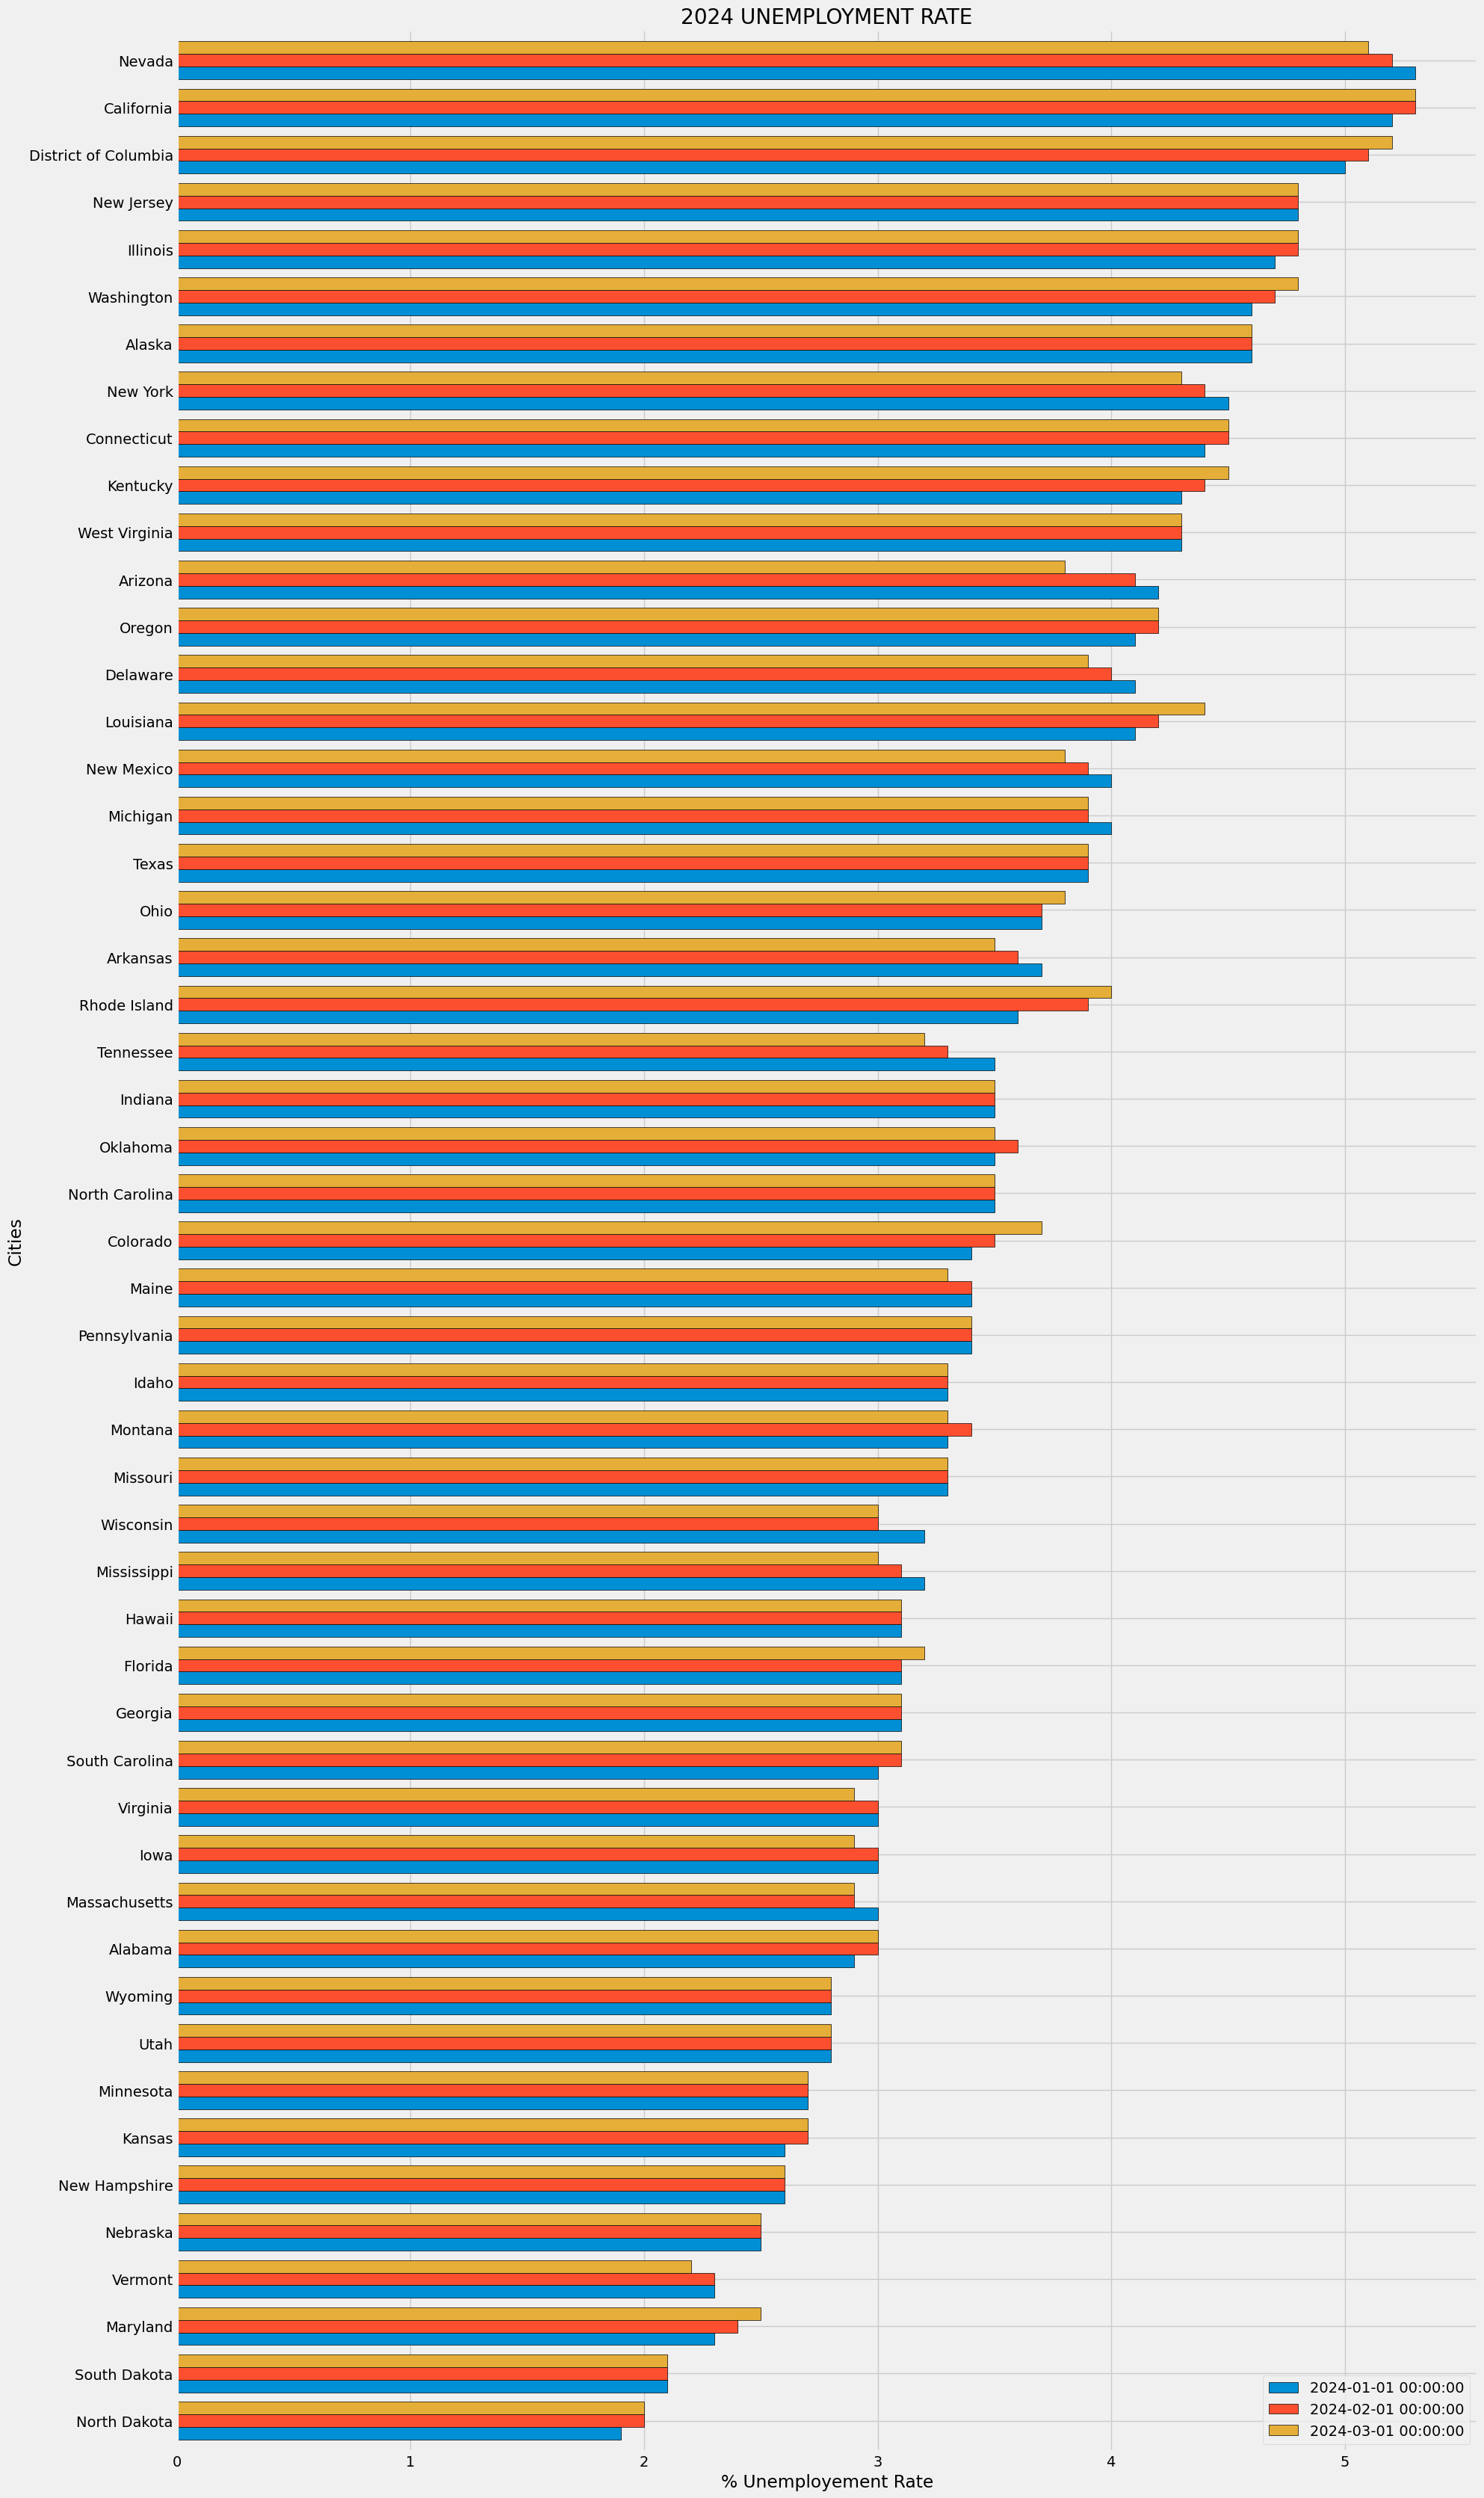

In [479]:
april = unemp_april.plot(kind = 'barh', figsize = (20,40), width = 0.8, edgecolor = 'black', title = '2024 UNEMPLOYMENT RATE')
april.legend()
april.set_xlabel('% Unemployement Rate')
april.set_ylabel('Cities')

## PARTICIPATION RATE

In [251]:
part_df = fred.search('participation  rate state', filter = ('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df = part_df.loc[part_df['title'].str.contains('Labor Force Participation Rate for')]
part_df

id realtime_start realtime_end  \
series id                                        
LBSSA06    LBSSA06     2024-05-04   2024-05-04   
LBSSA01    LBSSA01     2024-05-04   2024-05-04   
LBSSA36    LBSSA36     2024-05-04   2024-05-04   
LBSSA26    LBSSA26     2024-05-04   2024-05-04   
LBSSA28    LBSSA28     2024-05-04   2024-05-04   
LBSSA48    LBSSA48     2024-05-04   2024-05-04   
LBSSA12    LBSSA12     2024-05-04   2024-05-04   
LBSSA21    LBSSA21     2024-05-04   2024-05-04   
LBSSA39    LBSSA39     2024-05-04   2024-05-04   
LBSSA55    LBSSA55     2024-05-04   2024-05-04   
LBSSA42    LBSSA42     2024-05-04   2024-05-04   
LBSSA25    LBSSA25     2024-05-04   2024-05-04   
LBSSA27    LBSSA27     2024-05-04   2024-05-04   
LBSSA24    LBSSA24     2024-05-04   2024-05-04   
LBSSA54    LBSSA54     2024-05-04   2024-05-04   
LBSSA47    LBSSA47     2024-05-04   2024-05-04   
LBSSA23    LBSSA23     2024-05-04   2024-05-04   
LBSSA17    LBSSA17     2024-05-04   2024-05-04   
LBSSA37    LBSSA37     2024-05-04   2024-05-04   
LBSSA13    LBSSA13     2024-05-04   2024-05-04   
LBSSA22    LBSSA22     2024-05-04   2024-05-04   
LBSSA45    LBSSA45     2024-05-04   2024-05-04   
LBSSA08    LBSSA08     2024-05-04   2024-05-04   
LBSSA49    LBSSA49     2024-05-04   2024-05-04   
LBSSA51    LBSSA51     2024-05-04   2024-05-04   
LBSSA18    LBSSA18     2024-05-04   2024-05-04   
LBSSA29    LBSSA29     2024-05-04   2024-05-04   
LBSSA34    LBSSA34     2024-05-04   2024-05-04   
LBSSA19    LBSSA19     2024-05-04   2024-05-04   
LBSSA02    LBSSA02     2024-05-04   2024-05-04   
LBSSA53    LBSSA53     2024-05-04   2024-05-04   
LBSSA04    LBSSA04     2024-05-04   2024-05-04   
LBSSA35    LBSSA35     2024-05-04   2024-05-04   
LBSSA16    LBSSA16     2024-05-04   2024-05-04   
LBSSA05    LBSSA05     2024-05-04   2024-05-04   
LBSSA40    LBSSA40     2024-05-04   2024-05-04   
LBSSA31    LBSSA31     2024-05-04   2024-05-04   
LBSSA15    LBSSA15     2024-05-04   2024-05-04   
LBSSA32    LBSSA32     2024-05-04   2024-05-04   
LBSSA30    LBSSA30     2024-05-04   2024-05-04   
LBSSA41    LBSSA41     2024-05-04   2024-05-04   
LBSSA33    LBSSA33     2024-05-04   2024-05-04   
LBSSA50    LBSSA50     2024-05-04   2024-05-04   
LBSSA09    LBSSA09     2024-05-04   2024-05-04   
LBSSA38    LBSSA38     2024-05-04   2024-05-04   
LBSSA46    LBSSA46     2024-05-04   2024-05-04   
LBSSA20    LBSSA20     2024-05-04   2024-05-04   
LBSSA44    LBSSA44     2024-05-04   2024-05-04   
LBSSA11    LBSSA11     2024-05-04   2024-05-04   
LBSSA10    LBSSA10     2024-05-04   2024-05-04   
LBSSA56    LBSSA56     2024-05-04   2024-05-04   

                                                       title  \
series id                                                      
LBSSA06        Labor Force Participation Rate for California   
LBSSA01           Labor Force Participation Rate for Alabama   
LBSSA36          Labor Force Participation Rate for New York   
LBSSA26          Labor Force Participation Rate for Michigan   
LBSSA28       Labor Force Participation Rate for Mississippi   
LBSSA48             Labor Force Participation Rate for Texas   
LBSSA12           Labor Force Participation Rate for Florida   
LBSSA21          Labor Force Participation Rate for Kentucky   
LBSSA39              Labor Force Participation Rate for Ohio   
LBSSA55         Labor Force Participation Rate for Wisconsin   
LBSSA42      Labor Force Participation Rate for Pennsylvania   
LBSSA25     Labor Force Participation Rate for Massachusetts   
LBSSA27         Labor Force Participation Rate for Minnesota   
LBSSA24          Labor Force Participation Rate for Maryland   
LBSSA54     Labor Force Participation Rate for West Virginia   
LBSSA47         Labor Force Participation Rate for Tennessee   
LBSSA23             Labor Force Participation Rate for Maine   
LBSSA17          Labor Force Participation Rate for Illinois   
LBSSA37    Labor Force Participation Rate for North Carolina   
LBSSA13           Lab

In [245]:
part_id_states = part_df['title'].str.replace('Labor Force Participation Rate for ', '').to_dict()

In [246]:
allresult = []

for myid in part_df.index:
    result = fred.get_series(myid)
    result = result.to_frame(name = myid)
    allresult.append(result)
part_states = pd.concat(allresult, axis = 1)

In [247]:
part_states.columns = [part_id_states[c] for c in part_states.columns]

## PARTICIPATION VS UNEMPLOYEMENT BY STATES

In [253]:
part_states = part_states.rename(columns= {'District Of Columbia' : 'District of Columbia'}) # DC fix
part_states.columns

Index(['California', 'Alabama', 'New York', 'Michigan', 'Mississippi', 'Texas',
       'Florida', 'Kentucky', 'Ohio', 'Wisconsin', 'Pennsylvania',
       'Massachusetts', 'Minnesota', 'Maryland', 'West Virginia', 'Tennessee',
       'Maine', 'Illinois', 'North Carolina', 'Georgia', 'Louisiana',
       'South Carolina', 'Colorado', 'Utah', 'Virginia', 'Indiana', 'Missouri',
       'New Jersey', 'Iowa', 'Alaska', 'Washington', 'Arizona', 'New Mexico',
       'Idaho', 'Arkansas', 'Oklahoma', 'Nebraska', 'Hawaii', 'Nevada',
       'Montana', 'Oregon', 'New Hampshire', 'Vermont', 'Connecticut',
       'North Dakota', 'South Dakota', 'Kansas', 'Rhode Island',
       'District of Columbia', 'Delaware', 'Wyoming'],
      dtype='object')

IndexError: index 50 is out of bounds for axis 0 with size 50

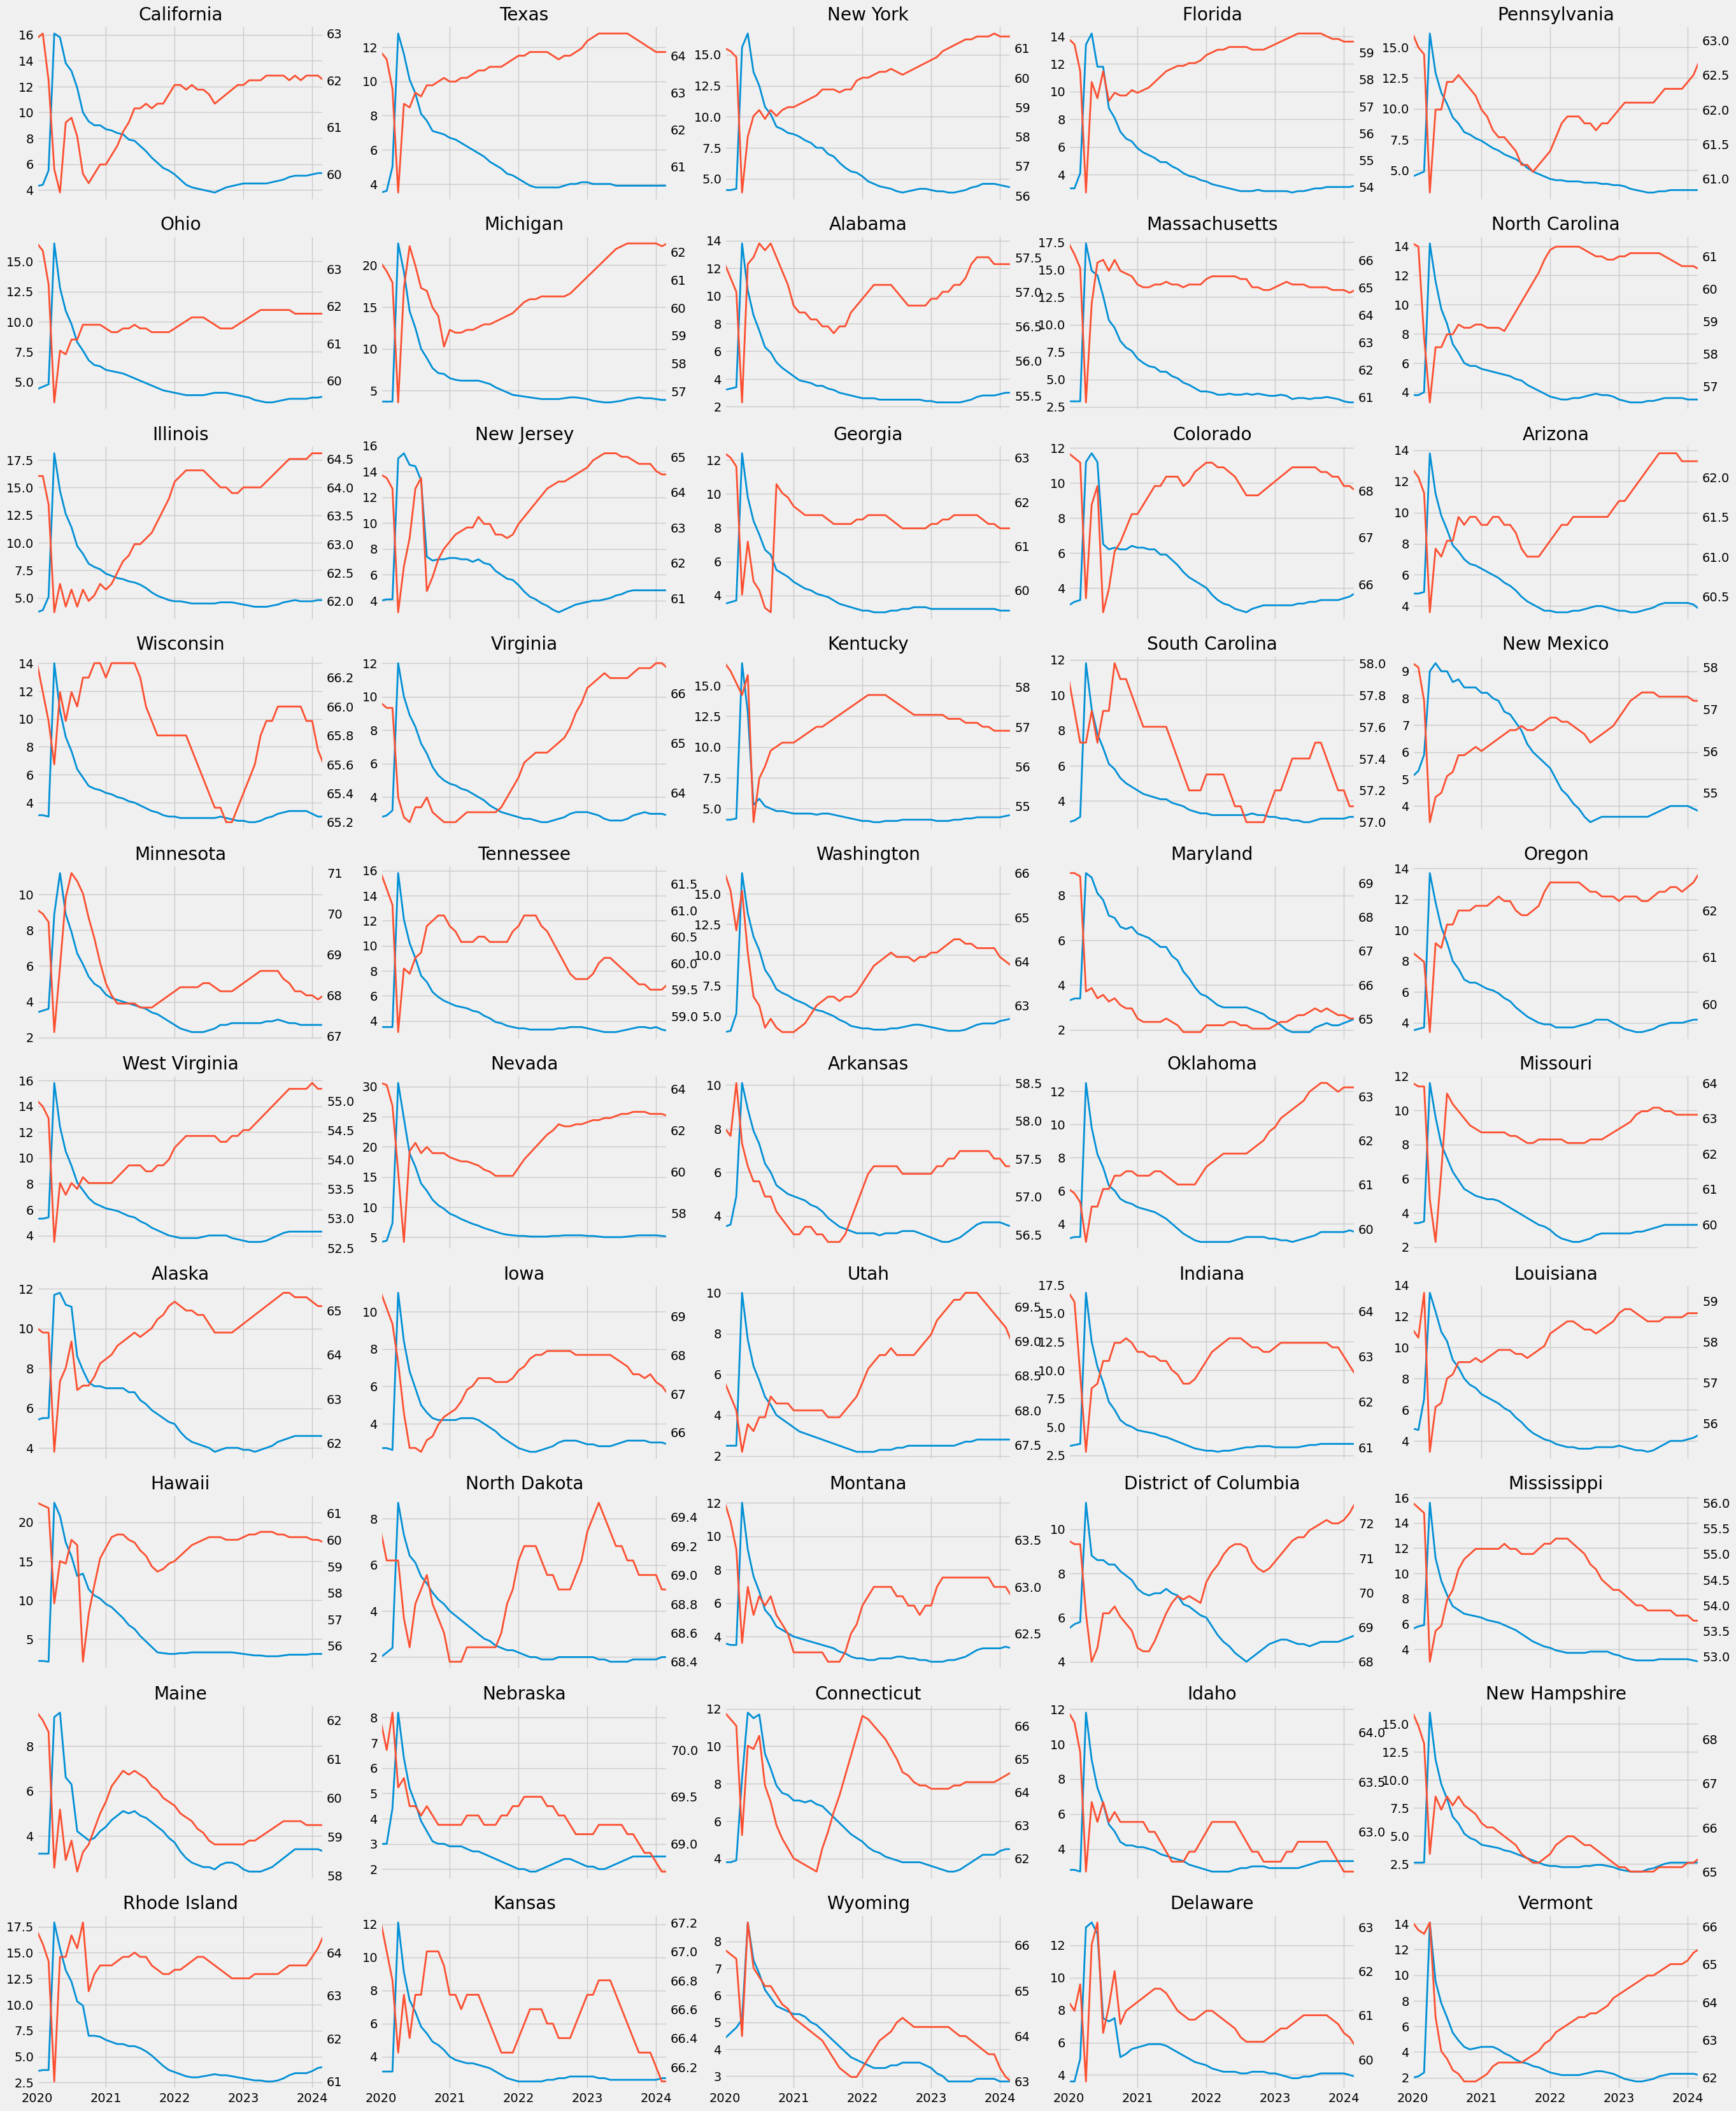

In [271]:
fig, axs = plt.subplots(10, 5, figsize = (30, 40), sharex = True)
axs = axs.flatten()

i = 0
for state in unemp_states.columns:
   # if state == "District of Columbia":
   #     continue
    ax2 = axs[i].twinx()
    unemp_states.query('index >= 2020')[state].plot(ax = axs[i], label = 'Unemployment'\
                                                           , lw = 2)
    part_states.query('index >= 2020')[state].plot(ax = ax2, label = 'Participation', color = color_pal[1],\
                                                          lw = 2)
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

# UNEMPLOYMENT BY GENDER

In [281]:
unemp_results = fred.search('unemployment rate')

In [287]:
unemp_results.title['LNS14000001']

'Unemployment Rate - Men'

In [411]:
fred.search('unemployment rate men')
unemp_men = fred.get_series('LNS14000001')

In [419]:
unemp_men.to_frame()

0
1948-01-01  3.4
1948-02-01  3.6
1948-03-01  3.8
1948-04-01  3.8
1948-05-01  3.5
...         ...
2023-12-01  3.9
2024-01-01  3.9
2024-02-01  3.8
2024-03-01  3.7
2024-04-01  3.9

[916 rows x 1 columns]

## UNEMPLOYMENT IN MEN

<Axes: title={'center': 'UNEMPLOYTMENT RATE IN MEN'}>

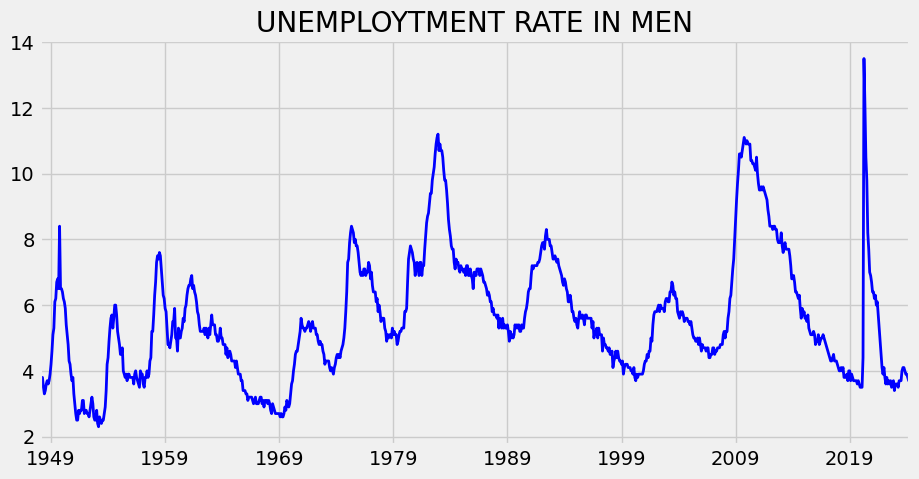

In [415]:
unemp_men.plot(kind = 'line', figsize = (10,5), title = 'UNEMPLOYTMENT RATE IN MEN', lw = 2, color = 'blue') 

In [472]:
unemp_m = fred.search('unemployment rate men', filter = ('frequency', 'Monthly'))
unemp_m = unemp_m.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_m = unemp_m.loc[unemp_m['title'].str.contains('Unemployment Rate - ')]

In [473]:
unemp_m.title

series id
LNS14000031    Unemployment Rate - 20 Yrs. & over, Black or A...
LNS14000001                              Unemployment Rate - Men
LNS14000028        Unemployment Rate - 20 Yrs. & over, White Men
LNS14000025              Unemployment Rate - 20 Yrs. & over, Men
LNS14000061                  Unemployment Rate - 25-54 Yrs., Men
LNS14000150                      Unemployment Rate - Married Men
LNS14000037                  Unemployment Rate - 20-24 Yrs., Men
LNS14000173                  Unemployment Rate - 35-44 Yrs., Men
LNS14000164                  Unemployment Rate - 25-34 Yrs., Men
LNS14000013                  Unemployment Rate - 16-19 Yrs., Men
LNS14024231              Unemployment Rate - 55 Yrs. & over, Men
LNS14024885                  Unemployment Rate - 16-24 Yrs., Men
LNS14000049              Unemployment Rate - 25 Yrs. & over, Men
LNS14000154                  Unemployment Rate - 18-19 Yrs., Men
LNS14000182                  Unemployment Rate - 45-54 Yrs., Men
LNS14000152    

In [474]:
id_men = unemp_m['title'].str.replace('Unemployment Rate - ', '').to_dict()

In [475]:
mresult = []

for myid in unemp_m.index:
    result = fred.get_series(myid)
    result = result.to_frame(name = myid)
    mresult.append(result)
unemp_m = pd.concat(mresult, axis = 1)

In [476]:
unemp_m.columns = [id_men[c] for c in unemp_m.columns]

In [510]:
new_names = {'Men' : 'Men (Overall)', 
             '16-19 Yrs., Men' : '16-19', 
             '20-24 Yrs., Men' : '20-24',
             '25-34 Yrs., Men' : '25-34', 
             '35-44 Yrs., Men' : '35-44',
             '45-54 Yrs., Men' : '45-54',
             '55 Yrs. & over, Men' : '55 Over'}

unemp_m = unemp_m.rename(columns = new_names) # arrange data

In [508]:
px. line(unemp_m) # men plot

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



## UNEMPLOYMENT IN WOMEN

In [511]:
fred.search('unemployment rate women')
unemp_women = fred.get_series('LNS14000002')

<Axes: title={'center': 'UNEMPLOYTMENT RATE IN WOMEN'}>

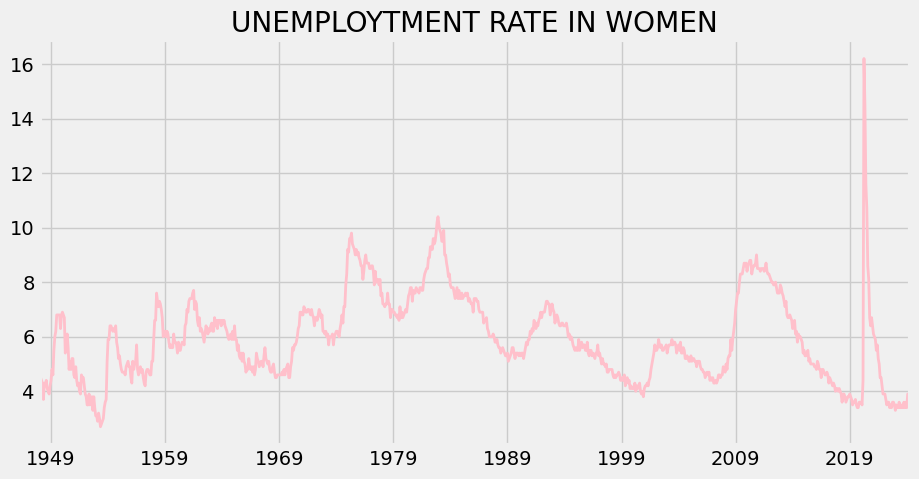

In [512]:
unemp_women.plot(figsize = (10, 5), title = 'UNEMPLOYTMENT RATE IN WOMEN', lw = 2, color = 'pink')

In [580]:
unemp_w = fred.search('unemployment rate women', filter = ('frequency', 'Monthly'))
unemp_w = unemp_w.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_w = unemp_w.loc[unemp_w['title'].str.contains('Unemployment Rate - ')]

In [581]:
unemp_w.title

series id
LNS14000002                            Unemployment Rate - Women
LNS14000032    Unemployment Rate - 20 Yrs. & over, Black or A...
LNS14000315                    Unemployment Rate - Married Women
LNS14000029      Unemployment Rate - 20 Yrs. & over, White Women
LNS14000026            Unemployment Rate - 20 Yrs. & over, Women
LNS14000062                Unemployment Rate - 25-54 Yrs., Women
LNS14000014                Unemployment Rate - 16-19 Yrs., Women
LNS14000327                Unemployment Rate - 25-34 Yrs., Women
LNS14024886                Unemployment Rate - 16-24 Yrs., Women
LNS14000038                Unemployment Rate - 20-24 Yrs., Women
LNS14024232            Unemployment Rate - 55 Yrs. & over, Women
LNS14000319                Unemployment Rate - 18-19 Yrs., Women
LNS14000050            Unemployment Rate - 25 Yrs. & over, Women
LNS14000334                Unemployment Rate - 35-44 Yrs., Women
LNS14000341                Unemployment Rate - 45-54 Yrs., Women
LNS14000317    

In [582]:
id_women = unemp_w['title'].str.replace('Unemployment Rate - ', '').to_dict()

In [583]:
wresult = []

for myid in unemp_w.index:
    result = fred.get_series(myid)
    result = result.to_frame(name = myid)
    wresult.append(result)
unemp_w = pd.concat(wresult, axis = 1)

In [584]:
unemp_w.columns = [id_women[c] for c in unemp_w.columns]

In [585]:
unemp_w = unemp_w.drop(['20 Yrs. & over, Black or African American Women',
              '20 Yrs. & over, White Women',
              '20 Yrs. & over, Women',
              '25-54 Yrs., Women',  
              '16-24 Yrs., Women',
              '18-19 Yrs., Women', 
              '25 Yrs. & over, Women', 
              '16-17 Yrs., Women'], axis = 1) #clean data

In [587]:
new_names = {'Women' : 'Women (Overall)', 
             '16-19 Yrs., Women' : '16-19', 
             '20-24 Yrs., Women' : '20-24',
             '25-34 Yrs., Women' : '25-34',
             '35-44 Yrs., Women' : '35-44',
             '45-54 Yrs., Women' : '45-54',
             '55 Yrs. & over, Women' : '55 Over'}

unemp_w = unemp_w.rename(columns = new_names) # arrange data

In [589]:
new_order = ['Women (Overall)', '16-19', '20-24', '25-34', '35-44', '45-54', '55 Over', 'Married Women']
unemp_w = unemp_w[new_order]

In [590]:
px.line(unemp_w)

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [595]:
unemp_

Women (Overall)  16-19  20-24  25-34  35-44  45-54  55 Over  \
1948-01-01              3.3    7.2    3.4    4.3    1.8    2.1      NaN   
1948-02-01              4.5    8.9    4.5    5.1    2.6    3.3      NaN   
1948-03-01              4.4    8.6    5.4    3.5    3.0    3.3      NaN   
1948-04-01              4.3    9.2    5.0    3.8    3.5    3.1      NaN   
1948-05-01              3.7    6.1    4.9    3.3    3.0    2.9      NaN   
...                     ...    ...    ...    ...    ...    ...      ...   
2023-12-01              3.6   11.1    6.4    3.9    2.7    2.5      2.7   
2024-01-01              3.4    8.2    4.9    3.9    2.7    2.8      2.5   
2024-02-01              3.9   12.7    6.4    4.4    2.8    2.6      2.9   
2024-03-01              3.9   11.4    7.1    4.0    3.1    2.8      2.6   
2024-04-01              3.8   10.2    6.7    3.7    2.9    2.8      2.9   

            Married Women  
1948-01-01            NaN  
1948-02-01            NaN  
1948-03-01            NaN  
1948-04-01            NaN  
1948-05-01            NaN  
...                   ...  
2023-12-01            2.2  
2024-01-01            2.0  
2024-02-01            2.0  
2024-03-01            2.3  
2024-04-01            2.4  

[916 rows x 8 columns]